In [5]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os.path

sns.set() # Use seaborn's default style to make attractive graphs

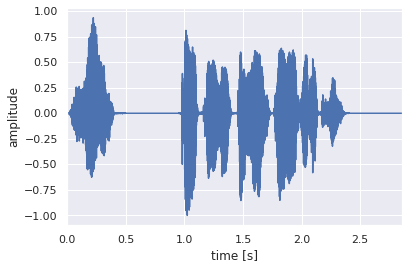

In [4]:
# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("vits_1.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

In [38]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

In [51]:
def draw_intensity(intensity, color):
    #plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=2, color=color)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

In [69]:
def draw_pitch(pitch, color='b'):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    #plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, '-', markersize=1, color=color)
    plt.grid(False)
    plt.ylim(0, 500)
    plt.xlabel("Time [s]")
    plt.ylabel("F0 [Hz]")

Processing vits_1.wav...
Processing vits_2.wav...
Processing vits_3.wav...
Processing vits_4.wav...
Processing vits_5.wav...


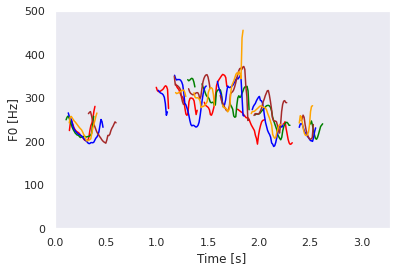

In [71]:
colors = ['red', 'green', 'blue', 'brown', 'orange']
i = 0
plt.figure()
for wave_file in glob.glob("*.wav"):
    print("Processing {}...".format(wave_file))
    snd = parselmouth.Sound(wave_file)
    pitch = snd.to_pitch()
    pre_emphasized_snd = snd.copy()
    pre_emphasized_snd.pre_emphasize()
    spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
    #intensity = pre_emphasized_snd.to_intensity()
    #plt.twinx()
    draw_pitch(pitch, colors[i])
    #draw_spectrogram(spectrogram)
    #draw_intensity(intensity, colors[i])
    plt.xlim([snd.xmin, snd.xmax])
    
    i += 1
#plt.show()
plt.savefig("pitch.png")

In [ ]:
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

/tmp/ipykernel_14078/991373869.py:3: RuntimeWarning: divide by zero encountered in log10
  sg_db = 10 * np.log10(spectrogram.values)
/tmp/ipykernel_14078/991373869.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')


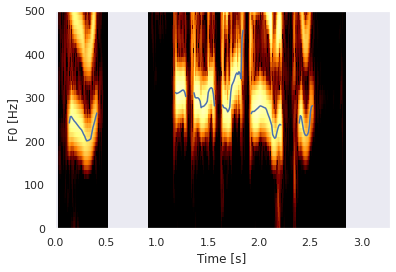

In [41]:
pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
#plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [6]:
for wave_file in glob.glob("*.wav"):
    print("Processing {}...".format(wave_file))
    s = parselmouth.Sound(wave_file)
#     s.pre_emphasize()
#     s.save(os.path.splitext(wave_file)[0] + "_pre.wav", 'WAV') # or parselmouth.SoundFileFormat.WAV instead of 'WAV'
#     s.save(os.path.splitext(wave_file)[0] + "_pre.aiff", 'AIFF')

Processing vits_1.wav...
Processing vits_2.wav...
Processing vits_3.wav...
Processing vits_4.wav...
Processing vits_5.wav...
